

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20641
    :Attribute Information:
        - median_income -----------> median income in block group
        - housing_median_age ------> median house age in block group
        - Total_rooms -------------> Total number of rooms per household
        - Total_bedrooms ----------> Total number of bedrooms per household
        - Population --------------> block group population
        - households --------------> number of household members
        - median_house_value    
        - ocean_proximity
        - Latitude ----------------> block group latitude
        - Longitude ---------------> block group longitude
        - Bedroom_size ------------> Total Bedroom size

   


This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data.

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.



In [ ]:
from google.colab import files
uploaded =files.upload()


Saving housing.csv to housing.csv


In [ ]:
import io
import pandas as pd  #importing pandas library
import numpy as np #importing numpy library
import matplotlib.pyplot as plt #import matplotlib library

df2= pd.read_csv(io.BytesIO(uploaded['housing.csv'])) #uploading csv file

In [ ]:
# Load the housing dataset
housing = pd.read_csv('housing.csv')

In [ ]:
# Display the first few rows of the dataset to get an overview
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# Check the data types of the columns (categorize as nominal, ordinal, discrete, continuous)
# Note: The categorization of features into nominal, ordinal, discrete, or continuous depends on the specific dataset and domain knowledge.
# Here's a generic example:
nominal_features = ['ocean_proximity']
ordinal_features = []  # Specify if any columns have ordinal data
discrete_features = []  # Specify if any columns are discrete
continuous_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


['ocean_proximity']

**# 1. What is the average median income of the dataset and check the distribution of data using appropriate plots?**

In [ ]:
# Calculate the average median income
average_median_income = housing['median_income'].mean() #calculating mean from median income
print(average_median_income)

3.8706710029069766


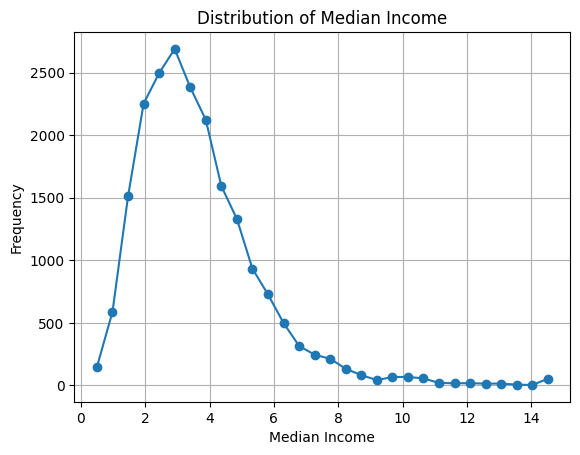

In [ ]:


import matplotlib.pyplot as plt

# Assuming you have already imported the necessary libraries and loaded your data

# Calculate the histogram
hist, bin_edges = np.histogram(housing['median_income'], bins=30)

# Create a line plot using bin edges as x-values
plt.plot(bin_edges[:-1], hist, marker='o', linestyle='-')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





**2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**

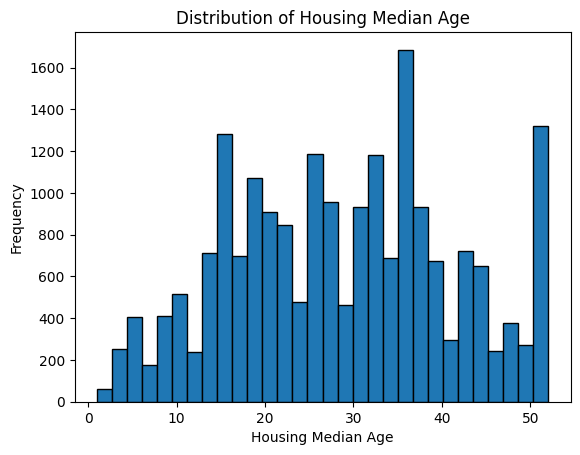

In [ ]:
# Plot the distribution of housing_median_age
plt.hist(housing['housing_median_age'], bins=30, edgecolor='k')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

**3. Show with the help of visualization, how median_income and median_house_values are related?**

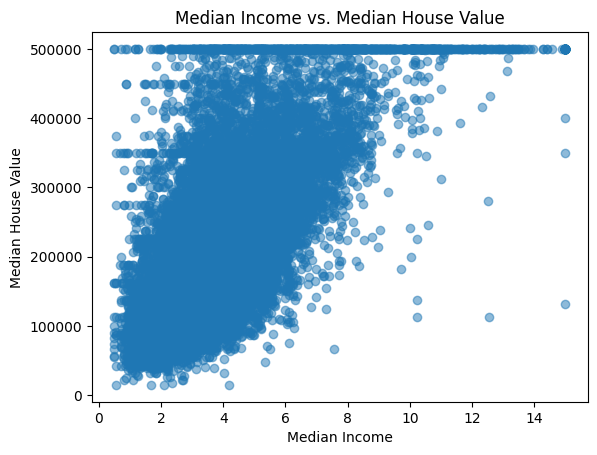

In [ ]:
# Create a scatter plot to show the relationship
plt.scatter(housing['median_income'], housing['median_house_value'], alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()
# Explanation: A scatter plot is used to visualize the relationship between median income and median house values.




**# 4. Create a dataset by deleting the corresponding examples from the dataset for which total_bedrooms are not available.**

In [ ]:
# Create a new dataset by removing rows with missing values in 'total_bedrooms'
housing_cleaned = housing.dropna(subset=['total_bedrooms'])

# Explanation: This code creates a new dataset by removing rows with missing values in the 'total_bedrooms' column.


In [ ]:
housing_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,Very High
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,Very High
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,High
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,High
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,Low
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,Low
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,Low
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,Low


**# 5. Create a dataset by filling the missing data with the mean value of the total_bedrooms in the original dataset**

In [ ]:
# Create a new dataset by filling missing values in 'total_bedrooms' with the mean
housing_filled = housing.copy()
mean_total_bedrooms = housing_filled['total_bedrooms'].mean()
housing_filled['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

# Explanation: This code creates a new dataset by filling missing values in 'total_bedrooms' with the mean value from the original dataset.


**# 6. Write a programming construct (create a user-defined function) to calculate the median value of the dataset wherever required.**

In [ ]:
# User-defined function to calculate median
def calculate_median(data):
    return data.median()
# Example of usage:
median_income_median = calculate_median(housing['median_income'])
median_income_median
# Explanation: This code defines a user-defined function 'calculate_median' to calculate the median of a dataset, making it reusable wherever needed.

3.5347999999999997

**# 7. Plot latitude versus longitude and explain your observations.**

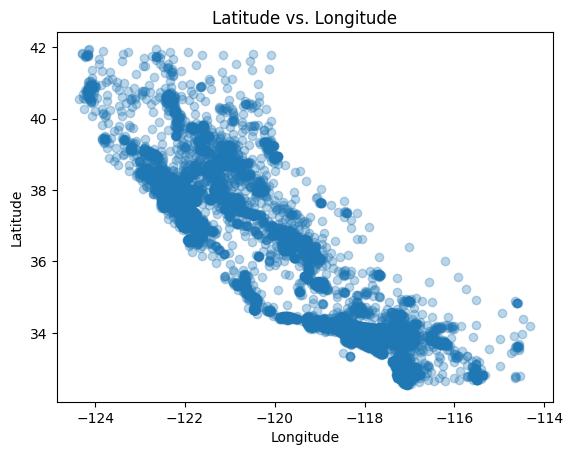

In [ ]:
# Plot latitude versus longitude
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.3)
plt.title('Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Explanation: This scatter plot helps visualize the geographical distribution of data points by plotting latitude against longitude.

**# 8. Create a dataset for which the ocean_proximity is 'Near ocean'.**

In [ ]:
# Create a subset of the dataset where ocean_proximity is 'Near Ocean'
near_ocean_data = housing[housing['ocean_proximity'] == 'NEAR OCEAN']
near_ocean_data
# Explanation: This code creates a new dataset containing only the rows where 'ocean_proximity' is 'Near Ocean.'


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


**# 9. Find the mean and median of the median income for the dataset created in question 8.**

In [ ]:
# Calculate the mean and median of median income in the 'Near Ocean' dataset
mean_median_income_near_ocean = near_ocean_data['median_income'].mean()
median_median_income_near_ocean = near_ocean_data['median_income'].median()
print(mean_median_income_near_ocean)
print(median_median_income_near_ocean)
# Explanation: This code calculates the mean and median of median income for the dataset with 'ocean_proximity' as 'Near Ocean.'

4.0057848006019565
3.64705


**# 10. Please create a new column named total_bedroom_size with specified categories.**

In [ ]:
# Create a new column 'total_bedroom_size' based on total bedrooms
housing['total_bedroom_size'] = pd.cut(housing['total_bedrooms'], bins=[0, 10, 1000, float('inf')], labels=['Small', 'Medium', 'Large'])

# Explanation: This code creates a new column 'total_bedroom_size' based on the total bedrooms, categorizing them into 'Small,' 'Medium,' and 'Large' as specified.
housing['total_bedroom_size']

0        Medium
1         Large
2        Medium
3        Medium
4        Medium
          ...  
20635    Medium
20636    Medium
20637    Medium
20638    Medium
20639    Medium
Name: total_bedroom_size, Length: 20640, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']